# Data Ingestion

In [11]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("processed.cleveland.data", header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df.columns = ['age','sex','cp','trestbps','chol','fbs',
              'restecg','thalach','exang','oldpeak',
              'slope','ca','thal','num']
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# Setting all non-zero values to 1
df.loc[df['num']!=0,['num']] = 1

In [5]:
df.head(5)
df.shape

(303, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
# imputing ? with 0 value
df.replace('?',0,inplace=True)

In [8]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [9]:
df['thal'] = df['thal'].astype(float)
df['ca'] = df['ca'].astype(float)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# Exploratory Data Analysis

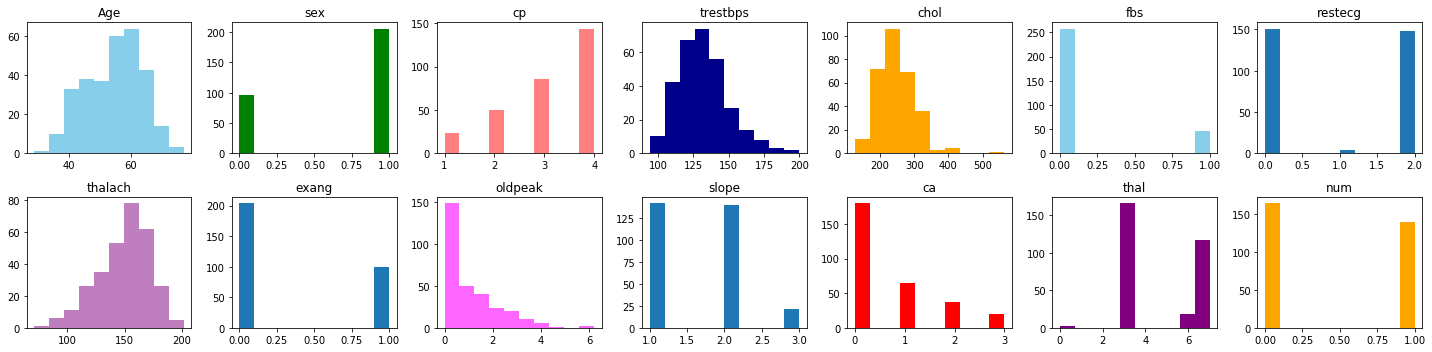

In [12]:
fig, axes = plt.subplots(2,7, figsize=(20,5))
axes[0,0].hist(df['age'],color = 'skyblue')
axes[0,0].set_title('Age')

axes[0,1].hist(df['sex'], color = 'green')
axes[0,1].set_title('sex')

axes[0,2].hist(df['cp'],color = 'red',alpha = 0.5)
axes[0,2].set_title('cp')

axes[0,3].hist(df['trestbps'],color = 'darkblue')
axes[0,3].set_title('trestbps')

axes[0,4].hist(df['chol'], color = 'orange')
axes[0,4].set_title('chol')

axes[0,5].hist(df['fbs'], color = 'skyblue')
axes[0,5].set_title('fbs')

axes[0,6].hist(df['restecg'])
axes[0,6].set_title('restecg')

axes[1,0].hist(df['thalach'], color = 'purple', alpha = 0.5)
axes[1,0].set_title('thalach')

axes[1,1].hist(df['exang'])
axes[1,1].set_title('exang')

axes[1,2].hist(df['oldpeak'], color='magenta',alpha=0.6)
axes[1,2].set_title('oldpeak')

axes[1,3].hist(df['slope'])
axes[1,3].set_title('slope')

axes[1,4].hist(df['ca'], color = 'red')
axes[1,4].set_title('ca')

axes[1,5].hist(df['thal'],color = 'purple')
axes[1,5].set_title('thal')

axes[1,6].hist(df['num'],color='orange')
axes[1,6].set_title('num')

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age Distribution')

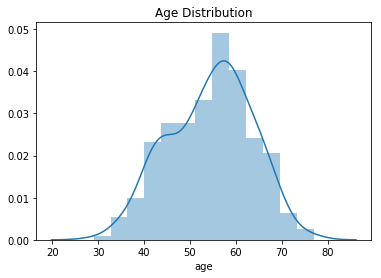

In [13]:
sns.distplot(df['age']).set_title('Age Distribution')

Text(0.5, 0.98, 'Cholesterol distribution: FEMALE = 0; MALE = 1')

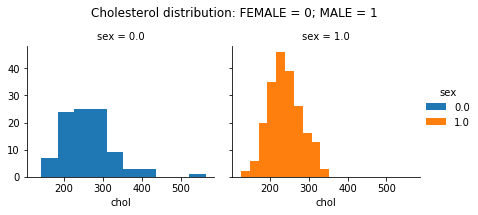

In [14]:
g = sns.FacetGrid(df,col='sex',hue='sex')
g.map(plt.hist,'chol').add_legend()
plt.subplots_adjust(top = 0.8)
g.fig.suptitle('Cholesterol distribution: FEMALE = 0; MALE = 1')

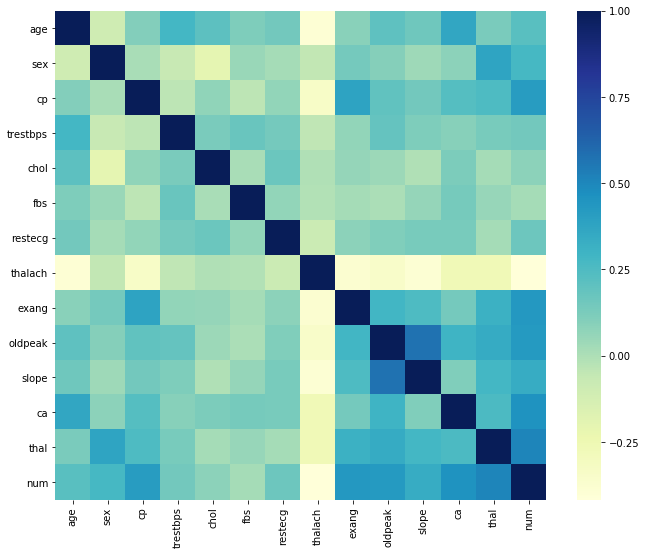

In [15]:
f, axes = plt.subplots(figsize=(11, 9))

cor = df.corr()
sns.heatmap(cor,cmap = 'YlGnBu')

# Data Modelling

In [16]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
y = df['num']
X = df.drop(['num'],axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 1)

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression()

In [22]:
logreg.fit(X_train,y_train)
prediction_log = logreg.predict(X_test)

C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
logreg_accuracy = logreg.score(X_test, y_test)*100
print(logreg_accuracy)

82.89473684210526


## Grid Search CV on Logistic Regression

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    'C' : np.logspace(-3,3,7),
    'penalty': ['l1','l2']
}


logreg_cv = GridSearchCV(estimator=logreg, param_grid=param_grid, cv= 10)
logreg_cv.fit(X_train, y_train)

C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linea

C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linea

C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\linea

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
print (logreg_cv.best_params_)
prediction_log_cv = logreg_cv.predict(X_test)
logreg_cv_accuracy = logreg_cv.score(X_test, y_test)*100
print(logreg_cv_accuracy)

{'C': 0.1, 'penalty': 'l2'}
86.8421052631579


## Support Vector Machines

In [29]:
from sklearn.svm import SVC

In [30]:
from sklearn.svm import SVC
svm = SVC(gamma='auto', random_state = 100, probability=True)
svm.fit(X_train, y_train)
pred_svm=svm.predict(X_test)
svm_accuracy = svm.score(X_test,y_test)*100
print(svm_accuracy)

53.94736842105263


## Grid Search on Support Vector Machines

In [31]:
param_grid = {
    'gamma': [0.001, 0.01, 0.1] 
}

svm_cv = GridSearchCV(estimator=svm, param_grid=param_grid, cv= 5)
svm_cv.fit(X_train, y_train)

C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=True, random_state=100, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'gamma': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
print (svm_cv.best_params_)
pred_svm_cv = svm_cv.predict(X_test)
svm_cv_accuracy = svm_cv.score(X_test, y_test)*100
print(svm_cv_accuracy)

{'gamma': 0.001}
68.42105263157895


# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
RFC = RandomForestClassifier(n_estimators = 100,random_state=60)

In [37]:
RFC.fit(X_train,y_train)
pred_rfc = RFC.predict(X_test)
RFC_accuracy = RFC.score(X_test,y_test)*100
print('RFC Accuracy: ',RFC_accuracy)

RFC Accuracy:  82.89473684210526


## Grid Search on Random Forest Classifier

In [36]:
param_grid = {
    'n_estimators': [2,4]
}


rfc_cv = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 5)
rfc_cv.fit(X, y)
print (rfc_cv.best_params_)
pred_rfc_cv = rfc_cv.predict(X_test)
rfc_cv_accuracy = rfc_cv.score(X_test, y_test)*100
print(rfc_cv_accuracy)

{'n_estimators': 4}
97.36842105263158


C:\Users\Hruda Mohod\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Assessing Model Performances

In [38]:
from sklearn.metrics import confusion_matrix

## Logistic Regression Confusion matrix

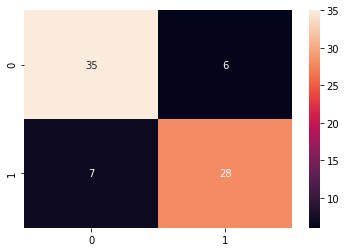

In [39]:
cm_log = confusion_matrix(y_test, prediction_log)
cm_log
sns.heatmap(cm_log, annot = True)
plt.show()

## GridSearchCV Logistic Regression Confusion Matrix

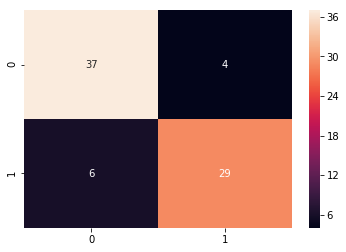

In [40]:
cm_log_cv = confusion_matrix(y_test, prediction_log_cv)
cm_log_cv
sns.heatmap(cm_log_cv, annot = True)
plt.show()

## Support Vector Machines Confusion Matrix

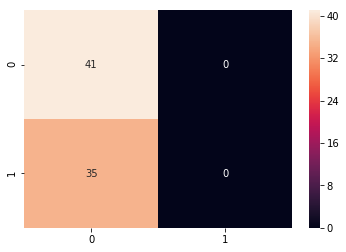

In [41]:
cm_svm = confusion_matrix(y_test, pred_svm)
cm_svm
sns.heatmap(cm_svm, annot = True)
plt.show()

## Grid Search CV SVM Confusion Matrix

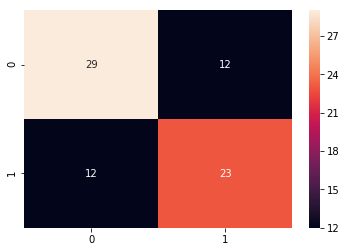

In [42]:
cm_svm_cv = confusion_matrix(y_test, pred_svm_cv)
cm_svm_cv
sns.heatmap(cm_svm_cv, annot = True)
plt.show()

## Random Forest Classifier Confusion Matrix

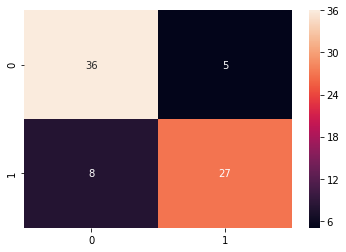

In [43]:
cm_rf = confusion_matrix(y_test, pred_rfc)
cm_rf
sns.heatmap(cm_rf, annot = True)
plt.show()

## GridSearchCV Random Forest Classifier Confusion Matrix

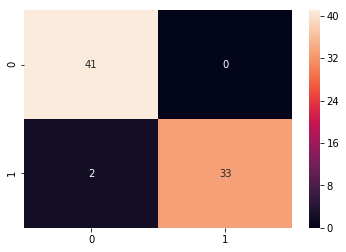

In [44]:
cm_rf_cv = confusion_matrix(y_test, pred_rfc_cv)
cm_rf_cv
sns.heatmap(cm_rf_cv, annot = True)
plt.show()

## Comparing accuracy of all the models

In [45]:
accuracy = [logreg_accuracy,logreg_cv_accuracy,svm_accuracy,svm_cv_accuracy,RFC_accuracy,rfc_cv_accuracy]
model_names = ['Logistic Reg','GridSearchCV Logistic Reg','SVM','GridSearchCV SVM','RFC','GridSearchCV RFC']

Text(0, 0.5, 'Classification Algorithms')

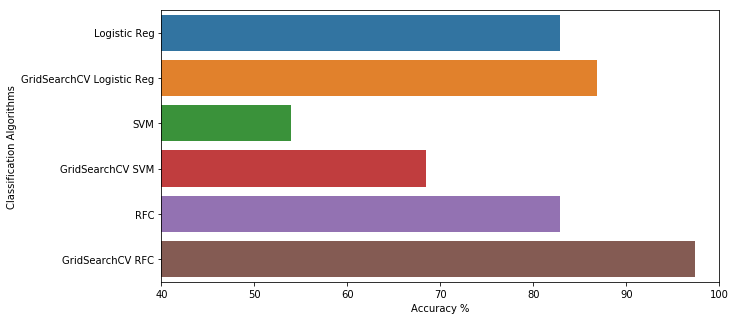

In [46]:
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(accuracy,model_names)
plt.xlim(40,100)
plt.xlabel('Accuracy %')
plt.ylabel('Classification Algorithms')